In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#   패키지 설치
#   pip install sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 모델 학습
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 성능 조절
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import silhouette_score

# 경고 메세지 숨김
import warnings     
warnings.filterwarnings('ignore')

## 테이블 열기

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
# 특성
fish_data = fish.iloc[:, 1:]

# 타겟
fish_target = fish.iloc[:, 0]

# 데이터 분할

In [4]:
data = fish_data       # 특성
target = fish_target     # 정답

xtrain, xtest, ytrain, ytest = train_test_split(
 
    data, target             # x: 특성, y: 정답
    , test_size = 0.25       # 테스트 데이터 비율(0~1)
#    , stratify = target      # 계층화(훈련＆테스트 데이터 비율: x=y)
    , random_state = 42     # 랜덤 시드
    )

# 데이터 스케일링(표준화)

In [5]:
ss = StandardScaler()

xtrain_scaled = ss.fit_transform(xtrain)    # 훈련 데이터 → 표준화
xtest_scaled = ss.transform(xtest)          # 테스트 데이터 → 표준화

# 확률적 경사 하강법

In [6]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(
    loss = 'log'             # 손실 함수
    , max_iter = 10         # 에포크 횟수
    , random_state = 42    # 랜덤 시드
    )

# (분류)변수.fit( xtrain, ytrain )              # 모델 학습
sgdc.fit( xtrain_scaled, ytrain )         # 모델 학습(스케일링)
sgdc.classes_       # 타겟 목록

# (분류)변수.score( xtrain, ytrain )            # 훈련 데이터 정확도
# (분류)변수.score( xtest, ytest )              # 테스트 데이터 정확도

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [7]:
sgdc.score( xtrain_scaled, ytrain )     # 훈련 데이터 정확도(스케일링)

0.773109243697479

In [8]:
sgdc.score( xtest_scaled, ytest )       # 테스트 데이터 정확도(스케일링)

0.775

## 훈련 데이터 추가 학습

In [9]:
sgdc.partial_fit( xtrain_scaled, ytrain )

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [10]:
sgdc.score( xtrain_scaled, ytrain )     # 훈련 데이터 정확도(스케일링)

0.8151260504201681

In [11]:
sgdc.score( xtest_scaled, ytest )       # 테스트 데이터 정확도(스케일링)

0.8

### 하이퍼 파라미터 - 에포크

In [12]:
sgdc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique( ytrain )

for _ in range(0, 300):
    sgdc.partial_fit( xtrain_scaled, ytrain, classes=classes )
    train_score.append( sgdc.score( xtrain_scaled, ytrain ) )
    test_score.append( sgdc.score( xtest_scaled, ytest ) )

### 그래프
파랑 - 훈련, 주황 - 테스트

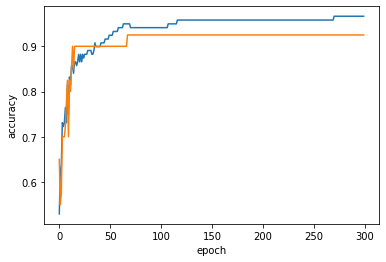

In [13]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 최적화: max_iter = 100

In [14]:
sgdc = SGDClassifier(
    loss = 'log'             # 손실 함수
    , max_iter = 100         # 에포크 횟수
    , tol=None
    , random_state = 42    # 랜덤 시드
    )

# (분류)변수.fit( xtrain, ytrain )              # 모델 학습
sgdc.fit( xtrain_scaled, ytrain )         # 모델 학습(스케일링)

# (분류)변수.score( xtrain, ytrain )            # 훈련 데이터 정확도
# (분류)변수.score( xtest, ytest )              # 테스트 데이터 정확도

print( sgdc.score( xtrain_scaled, ytrain ) )     # 훈련 데이터 정확도(스케일링)
print( sgdc.score( xtest_scaled, ytest ) )       # 테스트 데이터 정확도(스케일링)

0.957983193277311
0.925
